<a href="https://colab.research.google.com/github/PR-2023/CECS550/blob/main/dataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install squarify

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import urllib, json

In [12]:
user_info = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/data_format1/user_info_format1.csv");
user_log = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/data_format1/user_log_format1.csv");
train_format = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/data_format1/train_format1.csv");


In [13]:
user_log.columns

Index(['user_id', 'item_id', 'cat_id', 'seller_id', 'brand_id', 'time_stamp',
       'action_type'],
      dtype='object')

In [15]:
user_log = user_log[(user_log['item_id']>=641) & (user_log['item_id'] <=800)]
# user_log.to_csv("/content/drive/MyDrive/CECS550/data_format1/user_log_modified.csv",index=False)

In [16]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
215,328862,745,1577,1138,4104.0,820,0
16436,322159,678,1329,420,4058.0,1111,0
27306,70816,723,812,4850,7863.0,709,0
27307,70816,723,812,4850,7863.0,709,0
63311,302780,690,184,3449,7394.0,607,0


In [17]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [18]:

user_log = user_log.rename(columns={'seller_id': 'merchant_id'})

In [19]:
user_log.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type
215,328862,745,1577,1138,4104.0,820,0
16436,322159,678,1329,420,4058.0,1111,0
27306,70816,723,812,4850,7863.0,709,0
27307,70816,723,812,4850,7863.0,709,0
63311,302780,690,184,3449,7394.0,607,0


In [20]:
user_log['item_id'].min()

641

In [21]:
user_log['item_id'].max()

800

In [22]:
train_format.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [23]:
train_format.shape

(260864, 3)

In [24]:
print(user_log.isnull().sum())
print(user_info.isnull().sum())
print(train_format.isnull().sum())

user_id         0
item_id         0
cat_id          0
merchant_id     0
brand_id       11
time_stamp      0
action_type     0
dtype: int64
user_id         0
age_range    2217
gender       6436
dtype: int64
user_id        0
merchant_id    0
label          0
dtype: int64


In [25]:
data = pd.merge(user_log, user_info, on='user_id', how='left')
train_format.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [26]:
data = pd.merge(data, train_format, on=['user_id', 'merchant_id'])

In [27]:
data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range,gender,label
0,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
1,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
2,310303,650,656,3473,3305.0,1111,2,4.0,0.0,0
3,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
4,156939,653,35,4267,6046.0,1111,0,4.0,1.0,1


In [28]:
data.shape

(449, 10)

In [29]:
data.columns

Index(['user_id', 'item_id', 'cat_id', 'merchant_id', 'brand_id', 'time_stamp',
       'action_type', 'age_range', 'gender', 'label'],
      dtype='object')

In [30]:
repeater_data=data[data['label']==1]
repeater_data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range,gender,label
4,156939,653,35,4267,6046.0,1111,0,4.0,1.0,1
5,156939,653,35,4267,6046.0,1111,2,4.0,1.0,1
7,313743,778,1577,4502,7128.0,1111,0,6.0,0.0,1
43,312184,703,821,4847,4276.0,1111,3,2.0,0.0,1
84,226173,703,821,4847,4276.0,921,0,3.0,0.0,1


In [31]:
repeater_data.groupby('gender').size().to_frame().reset_index()

,gender,0
0,0.0,19
1,1.0,2
2,2.0,3


In [32]:
non_repeater_data=data[data['label']==0]
non_repeater_data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range,gender,label
0,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
1,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
2,310303,650,656,3473,3305.0,1111,2,4.0,0.0,0
3,310303,650,656,3473,3305.0,1111,0,4.0,0.0,0
6,112950,795,1553,643,968.0,1102,0,4.0,0.0,0


In [33]:
non_repeater_data.groupby('gender').size().to_frame().reset_index()

,gender,0
0,0.0,403
1,1.0,15
2,2.0,6


In [34]:
data.isnull().sum()

user_id        0
item_id        0
cat_id         0
merchant_id    0
brand_id       0
time_stamp     0
action_type    0
age_range      0
gender         1
label          0
dtype: int64

In [35]:
data['label'].value_counts()

0    425
1     24
Name: label, dtype: int64

In [36]:
# Check the shape and size of the dataframes
print('Shape and size of user_behaviour_logs:', user_log.shape)
print('Shape and size of user_profile:', user_info.shape)
print('Shape and size of train_data:', train_format.shape)

# Check the data types of each column
print('Data types of user_behaviour_logs:\n', user_log.dtypes)
print('Data types of user_profile:\n', user_info.dtypes)
print('Data types of train_data:\n', train_format.dtypes)

# Check for any missing values in the dataframes
print('Missing values in user_behaviour_logs:', user_log.isnull().sum())
print('Missing values in user_profile:', user_info.isnull().sum())
print('Missing values in train_data:', train_format.isnull().sum())

# Check for any duplicates in the dataframes
print('Duplicate rows in user_behaviour_logs:', user_log.duplicated().sum())
print('Duplicate rows in user_profile:', user_info.duplicated().sum())
print('Duplicate rows in train_data:', train_format.duplicated().sum())

# Check the distribution of the target variable in the training data
print('Distribution of the target variable in train_data:\n', train_format['label'].value_counts())



Shape and size of user_behaviour_logs: (7329, 7)
Shape and size of user_profile: (424170, 3)
Shape and size of train_data: (260864, 3)
Data types of user_behaviour_logs:
 user_id          int64
item_id          int64
cat_id           int64
merchant_id      int64
brand_id       float64
time_stamp       int64
action_type      int64
dtype: object
Data types of user_profile:
 user_id        int64
age_range    float64
gender       float64
dtype: object
Data types of train_data:
 user_id        int64
merchant_id    int64
label          int64
dtype: object
Missing values in user_behaviour_logs: user_id         0
item_id         0
cat_id          0
merchant_id     0
brand_id       11
time_stamp      0
action_type     0
dtype: int64
Missing values in user_profile: user_id         0
age_range    2217
gender       6436
dtype: int64
Missing values in train_data: user_id        0
merchant_id    0
label          0
dtype: int64
Duplicate rows in user_behaviour_logs: 1643
Duplicate rows in user_profil

In [37]:
data['time_str']= data['time_stamp'].astype('str')
data['Day']=data['time_stamp']%100
data['Month']=(data['time_stamp']-data['Day'])/100

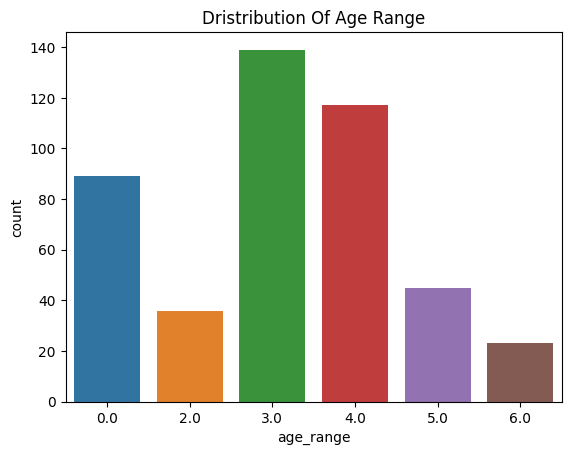

In [38]:
# plot the distribution of age range 
sns.countplot(x='age_range', data=data)
plt.title("Dristribution Of Age Range")
plt.show()


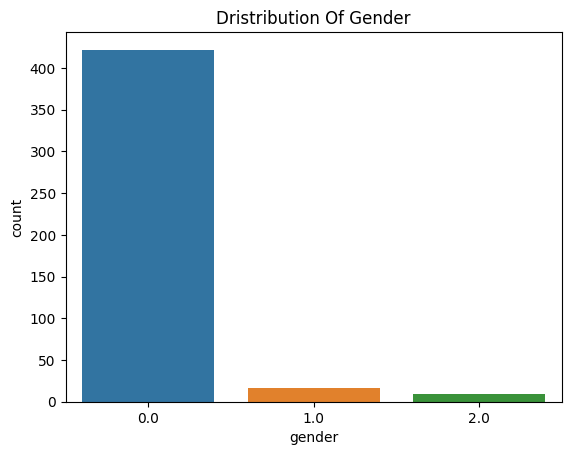

In [39]:

sns.countplot(x='gender', data=data)
plt.title("Dristribution Of Gender")
plt.show()


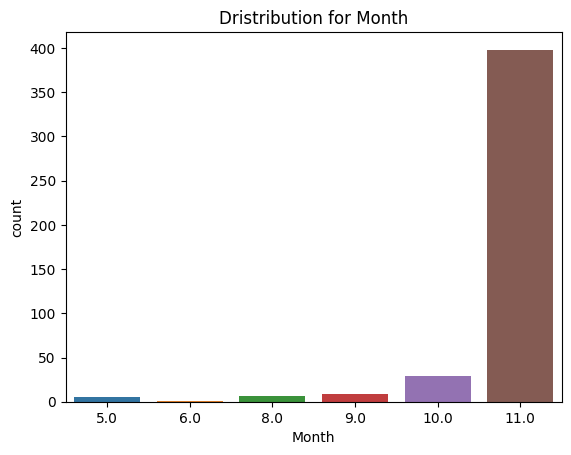

In [40]:
sns.countplot(x='Month', data=data)
plt.title('Dristribution for Month')
plt.show()

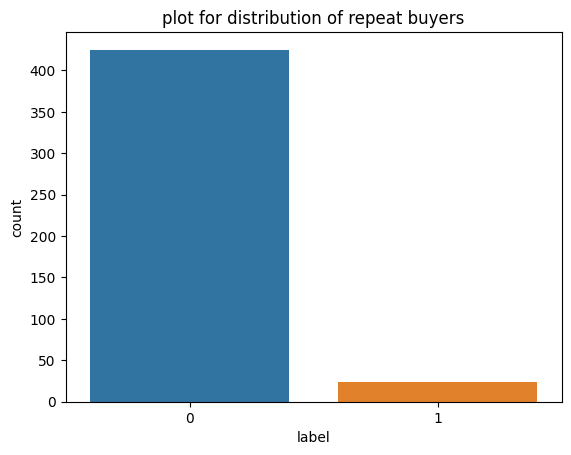

In [41]:
# plot the distribution of repeat buyers
sns.countplot(x='label', data=data)
plt.title("plot for distribution of repeat buyers")
plt.show()

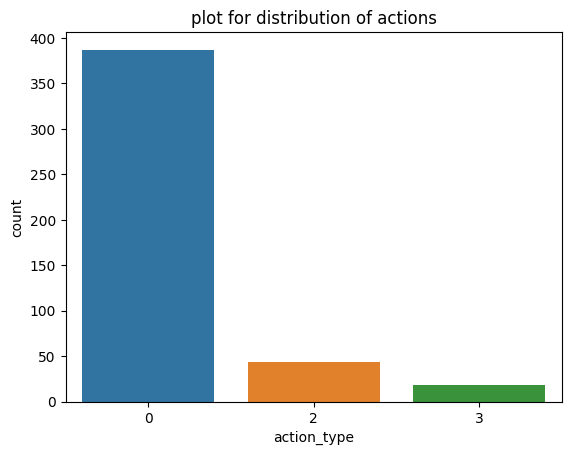

In [42]:
# plot the distribution of actions
sns.countplot(x='action_type', data=data)
plt.title("plot for distribution of actions")
plt.show()



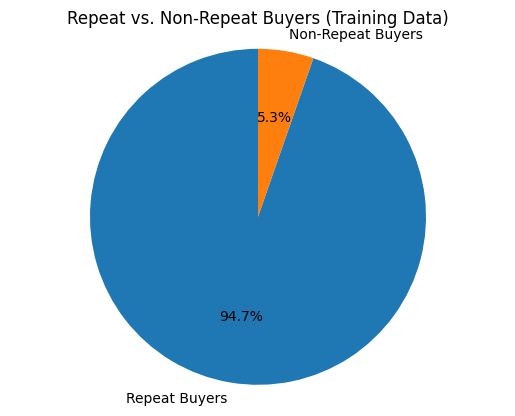

In [43]:
labels = ['Repeat Buyers', 'Non-Repeat Buyers']
sizes = data['label'].value_counts()  # Example percentages, replace with actual data

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Repeat vs. Non-Repeat Buyers (Training Data)')
plt.show()


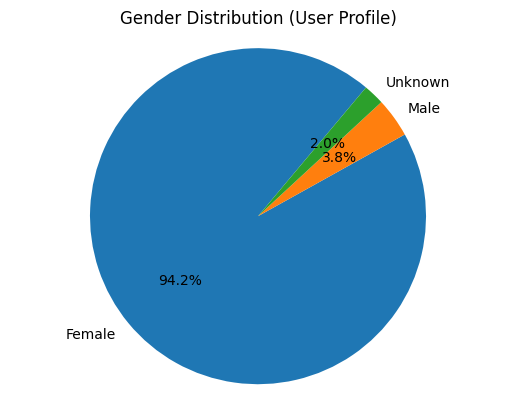

In [44]:
labels = ['Female', 'Male'  ,'Unknown']
#todo
sizes = data['gender'].value_counts()  # Example percentages, replace with actual data

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=50)
ax1.axis('equal')
plt.title('Gender Distribution (User Profile)')
plt.show()

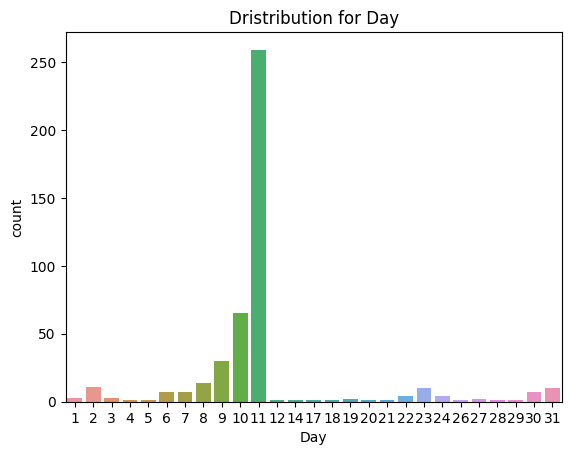

In [45]:
sns.countplot(x='Day', data=data)
plt.title('Dristribution for Day')
plt.show()

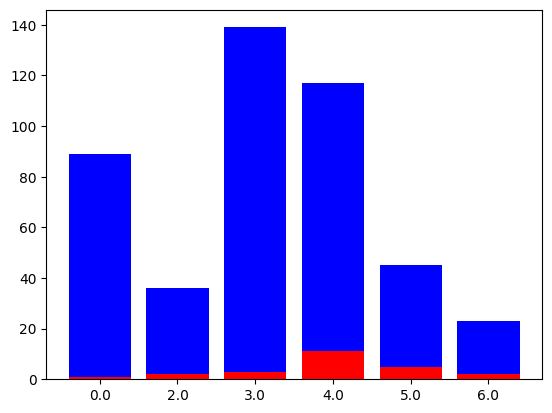

In [46]:

# Distribution of the target variable by age range
# sns.countplot(x='age_range', hue='label', data=data)
# plt.title('Distribution of the target variable by age range')
# plt.show()

x = ['0.0', '2.0', '3.0', '4.0', '5.0', '6.0']
dm = data.groupby(['age_range','label']).size().reset_index(name='frequency')
# for idx, x in enumerate(xs):
ev_li = [ele for idx, ele in enumerate(list(dm['frequency'])) if idx % 2  == 0]
od_li = [ele for idx, ele in enumerate(list(dm['frequency'])) if idx % 2 != 0]
# od_li = [ele for ele in list(df['frequency']) if df['label'] != 0]
y1 = np.array(ev_li)
y2 = np.array(od_li)
plt.bar(x, y2, color='r')
plt.bar(x, y1, bottom=y2, color='b')
plt.show()

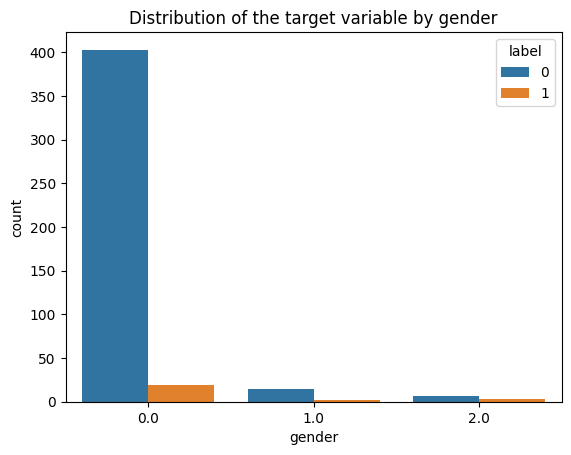

In [47]:

# Distribution of the target variable by gender
sns.countplot(x='gender', hue='label', data=data)
plt.title('Distribution of the target variable by gender')
plt.show()

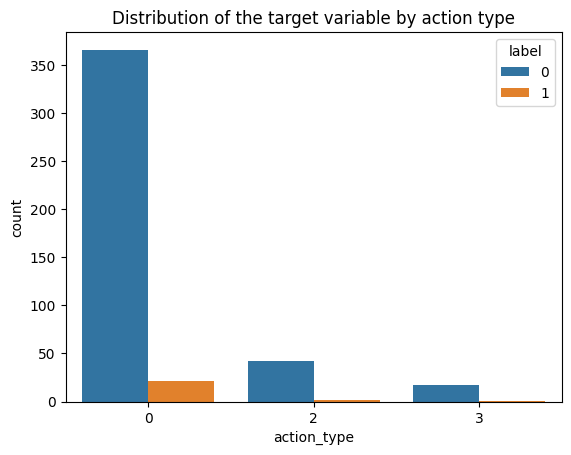

In [48]:

# Distribution of the target variable by action type
sns.countplot(x='action_type', hue='label', data=data)
plt.title('Distribution of the target variable by action type')
plt.show()

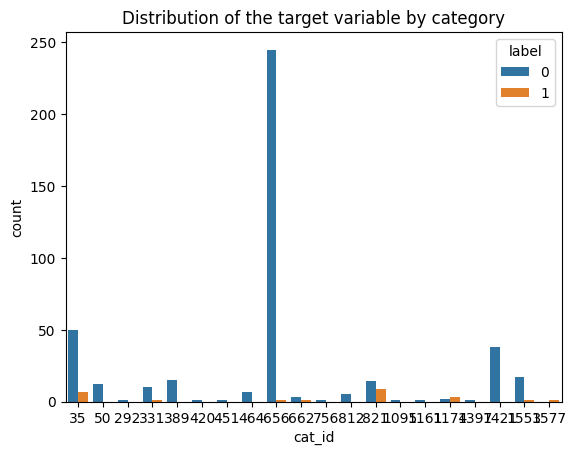

In [49]:

# Distribution of the target variable by category
sns.countplot(x='cat_id', hue='label', data=data)
plt.title('Distribution of the target variable by category')
plt.show()

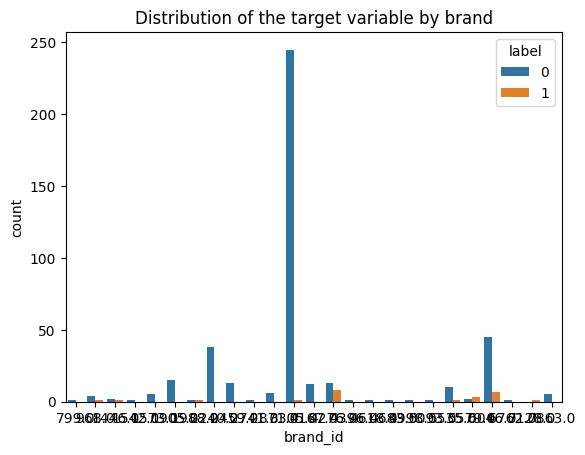

In [50]:

# Distribution of the target variable by brand
sns.countplot(x='brand_id', hue='label', data=data)
plt.title('Distribution of the target variable by brand')
plt.show()

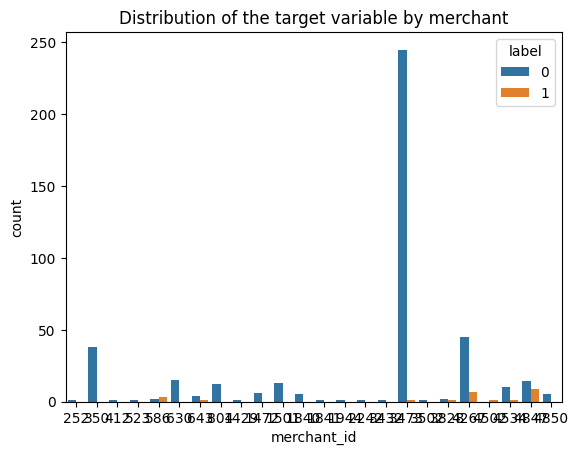

In [51]:

# Distribution of the target variable by merchant
sns.countplot(x='merchant_id', hue='label', data=data)
plt.title('Distribution of the target variable by merchant')
plt.show()



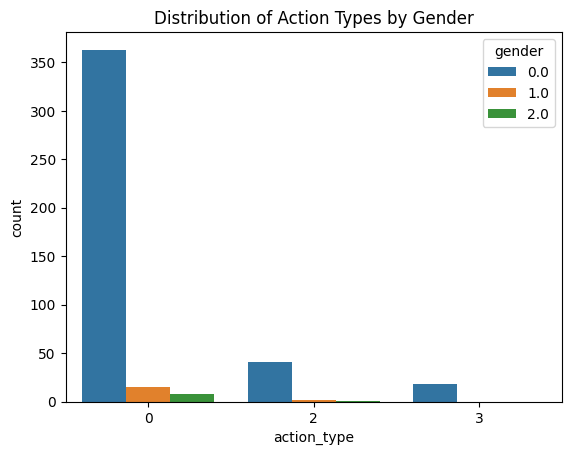

In [52]:
sns.countplot(x='action_type', hue='gender', data=data)
plt.title('Distribution of Action Types by Gender')
plt.show()

# x = ['0.0', '2.0', '3.0']
# dm = data.groupby(['action_type','gender']).size().reset_index(name='frequency')
# dm
# first_li = [ele for idx, ele in enumerate(list(dm['frequency'])) if dm['gender'][idx]  == 0]
# second_li = [ele for idx, ele in enumerate(list(dm['frequency'])) if dm['gender'][idx]  == 1]
# third_li = [ele for idx, ele in enumerate(list(dm['frequency'])) if dm['gender'][idx] == 2]

# n = max(len(first_li), len(second_li), len(third_li))
# listofzeros1 = [0] * n
# listofzeros2 = [0] * n
# listofzeros3 = [0] * n
# # x = [1,2]
# listofzeros1[:len(first_li)] = first_li
# listofzeros2[:len(second_li)] = second_li
# listofzeros3[:len(third_li)] = third_li
# # fill = [0] * n
# # second_li = [second_li[:n] + fill[len(second_li):] for second_li in second_li]
# # third_li = [third_li[:n] + fill[len(third_li):] for third_li in second_li]
# y1 = np.array(listofzeros1)
# y2 = np.array(listofzeros2)
# y3 = np.array(listofzeros3)
# # print(y1)
# # print(y2)
# # print(y3)
# plt.bar(x, y3, color='r')
# plt.bar(x, y2, bottom=y3, color='b')
# plt.bar(x, y1, bottom=y2, color='g')
# plt.show()

In [53]:
# Plot the distribution of repeat vs. non-repeat buyers by merchant
# repeat_buyers = train_format[train_format['label'] == 1].groupby('merchant_id')['label'].count().reset_index()
# non_repeat_buyers = train_format[train_format['label'] == 0].groupby('merchant_id')['label'].count().reset_index()
# merged_data = repeat_buyers.merge(non_repeat_buyers, on='merchant_id', suffixes=('_repeat', '_non_repeat'))
# merged_data.plot(x='merchant_id', kind='bar', stacked=True, title='Distribution of Repeat vs. Non-Repeat Buyers by Merchant')
# plt.show()

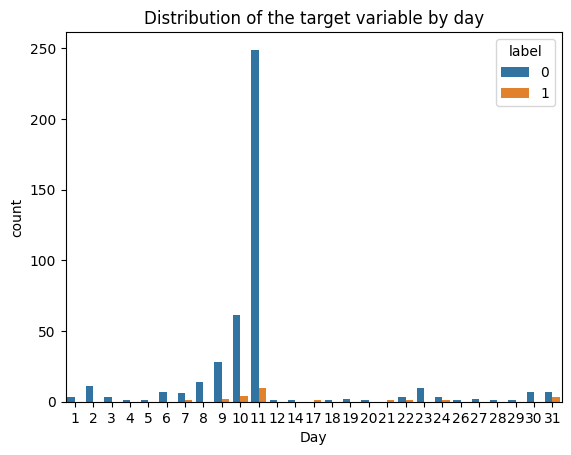

In [54]:
sns.countplot(x='Day', hue='label', data=data)
plt.title('Distribution of the target variable by day')
plt.show()

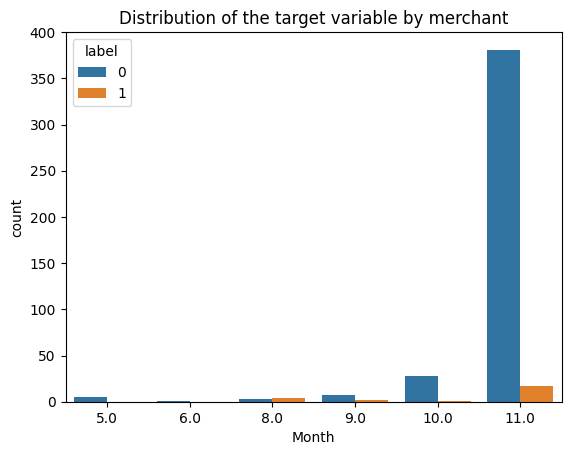

In [55]:
sns.countplot(x='Month', hue='label', data=data)
plt.title('Distribution of the target variable by merchant')
plt.show()

In [56]:
df = data.groupby(['action_type', 'label']).size().reset_index(name='count')
# Create a zoomable countplot
fig = px.sunburst(df, path=['action_type', 'label'], values='count', color='label')
fig.update_layout(title='Countplot of action_type and Label')
fig.show()

In [57]:
df = data.groupby(['gender', 'label']).size().reset_index(name='count')
# Create a zoomable countplot
fig = px.sunburst(df, path=['gender', 'label'], values='count', color='label')
fig.update_layout(title='Countplot of gender and Label')
fig.show()
# df = data.groupby(['gender', 'action_type']).size().reset_index(name='count')
# # Create a zoomable countplot
# fig = px.sunburst(df, path=['gender', 'action_type'], values='count', color='action_type')
# fig.update_layout(title='Countplot of gender and action_type')
# fig.show()

In [58]:

# sns.violinplot(x='age_range', y='label', data=data)
# plt.title("Violin Plot of age range and label")
# plt.show()

In [59]:
activity_count = data.groupby('user_id')['action_type'].count().reset_index()
activity_count.columns = ['user_id', 'activity_count']

data = pd.merge(data, activity_count, on='user_id', how='left')

In [60]:
click_count = data[data['action_type']==0].groupby('user_id')['action_type'].count().reset_index()
click_count.columns = ['user_id', 'click_count']
data = pd.merge(data,click_count,on='user_id', how='left')

In [61]:
add_to_cart_count = data[data['action_type']==1].groupby('user_id')['action_type'].count().reset_index()
add_to_cart_count.columns = ['user_id', 'add_to_cart_count']
data = pd.merge(data, add_to_cart_count, on='user_id', how='left')

In [62]:
purchase_count = data[data['action_type']==2].groupby('user_id')['action_type'].count().reset_index()
purchase_count.columns = ['user_id', 'purchase_count']
data = pd.merge(data, purchase_count, on='user_id', how='left')

In [63]:
favourite_count = data[data['action_type']==3].groupby('user_id')['action_type'].count().reset_index()
favourite_count.columns = ['user_id', 'favourite_count']
data = pd.merge(data, favourite_count, on='user_id', how='left')

In [64]:
data.fillna(0, inplace=True)

In [65]:
# df = data.groupby(['age_range','label']).size().reset_index(name='frequency')
# df

<ipython-input-66-d83916f9dd7a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



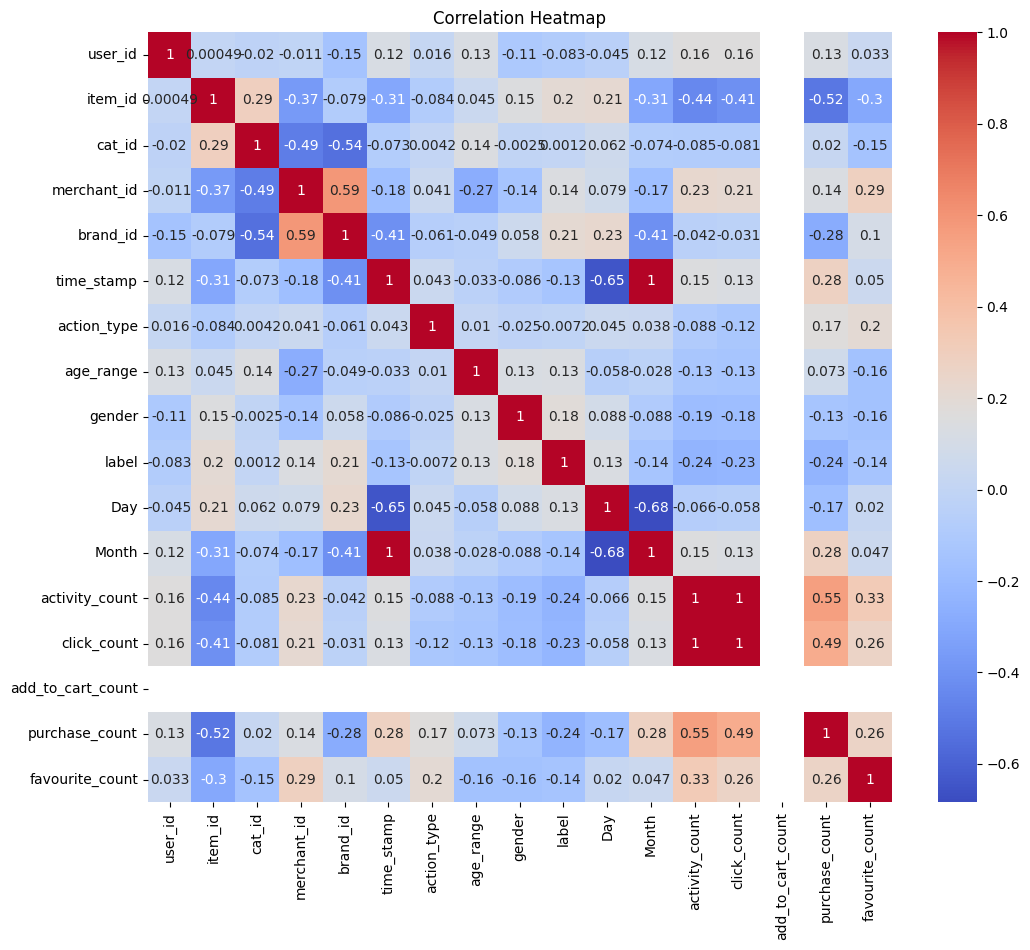

In [66]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a heatmap with seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)

# Set the title of the figure
ax.set_title("Correlation Heatmap")

# Show the plot
plt.show()